In [229]:
#valid entries for mlb_id are any mlb player's 'key_mlbam' which can be found using the playerid_lookup
#function

def player_scouter(mlb_id):
    
    from pybaseball import statcast_batter
    
    import matplotlib.pyplot as plt
    
    import pandas as pd
    
    import matplotlib.patches as patches
    
    from datetime import datetime
    
    today = datetime.today().strftime('%Y-%m-%d')
    
    #gets pitch data for chosen player
    data = statcast_batter('2015-3-30', today, player_id = mlb_id)
    
    #removes all pitches that are intentional balls or pitchouts
    new_data = data.loc[(data['description']!= 'intent_ball') | (data['pitch_type']!='PO')]
    
    #gets the mean of every available stat (will be used to generate strikezone)
    avgs =new_data.describe()
    
    #gets the average top measurement of the strikezone for the specific player
    top_sz = avgs['sz_top'][1]
    
    #gets the average bottom measurement of the strikezone for the specific player
    bot_sz = avgs['sz_bot'][1]
    
    #gets all pitches that were hit into play by player
    in_play = new_data[new_data['description'].str.contains('hit_into_play')]
    
    fig, ax = plt.subplots()
    
    
    #generates strikezone using the measurements we got above
    strikezone = patches.Rectangle((-0.70833,bot_sz), width= 17/12, height = (top_sz-bot_sz), fill=False)
    
    #generates hexbin plot of all pitches that the player hit and measures the estimated ba of every pitch
    #in each bin 
    graph  = ax.hexbin(in_play['plate_x'],in_play['plate_z'],C=in_play['estimated_ba_using_speedangle'], 
           gridsize=(5,5), mincnt=4, vmax = 1,vmin =0, cmap= 'Reds')
    
    #makes the graph the right shape 
    ax.axis('scaled')
    
    #overlays the strikezone over the hexbin plot
    ax.add_patch(strikezone)
    
    #places a colorbar to measure the estimated ba in each hexagon
    cbar = fig.colorbar(graph)
    
    cbar.set_label('Estimated BA')
    
    ax.set_title(data['player_name'][0] +' general hot spots')
    
    return graph

In [154]:
from pybaseball import playerid_lookup
playerid_lookup('trout', 'mike')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,trout,mike,545361,troum001,troutmi01,10155,2011.0,2019.0


Gathering Player Data


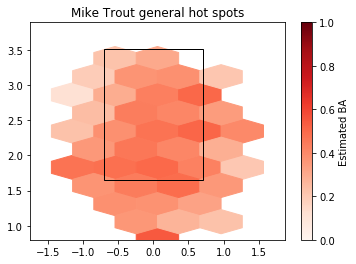

In [226]:
player_scouter(545361)

Gathering Player Data


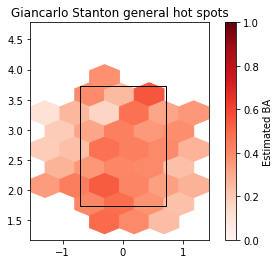

In [219]:
player_scouter(519317)

Gathering Player Data


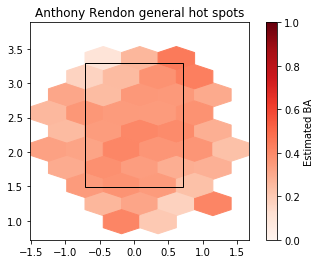

In [220]:
player_scouter(543685)

Gathering Player Data


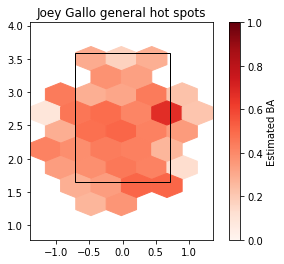

In [221]:
player_scouter(608336)

In [237]:
playerid_lookup('albies', 'ozzie')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,albies,ozzie,645277,albio001,albieoz01,16556,2017.0,2019.0


Gathering Player Data


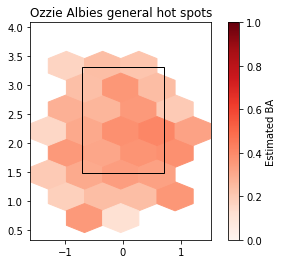

In [238]:
player_scouter(645277)